In [58]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

## Filter for US Data Analyst Roles:

In [59]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

#df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [60]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

## Job Locations :

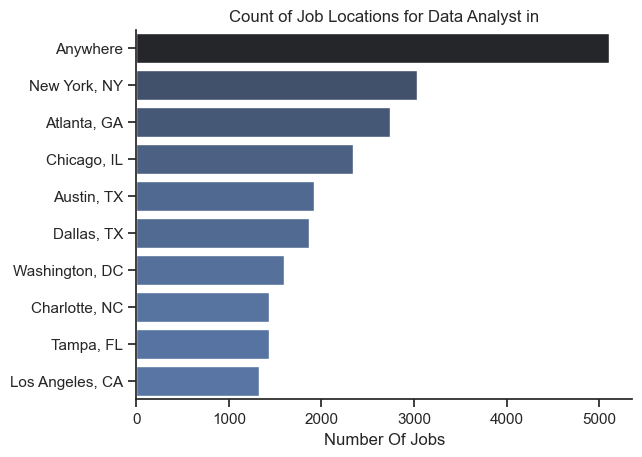

In [61]:
import matplotlib.pyplot as plt
sns.set_theme(style='ticks')

ax = sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend= False)
ax.set_ylabel('')
sns.despine()
plt.title('Count of Job Locations for Data Analyst in')
plt.xlabel('Number Of Jobs')
plt.show()

## Job Opportunities:

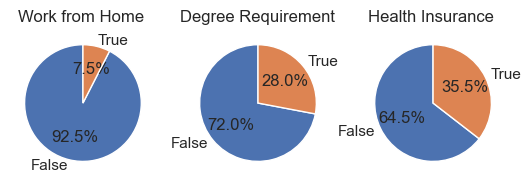

In [62]:
fig , ax = plt.subplots(1,3)

dict_column = {
    
    'job_work_from_home': 'Work from Home ',
    'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance': 'Health Insurance '
}

for i ,(column,title) in enumerate(dict_column.items()):
    
    #print(i,column,title)
    ax[i].pie(df_DA_US[column].value_counts(), startangle = 90,autopct = '%1.1f%%', labels = ['False','True'])
    ax[i].set_title(title)
    
plt.show()


## Companies to Explore:

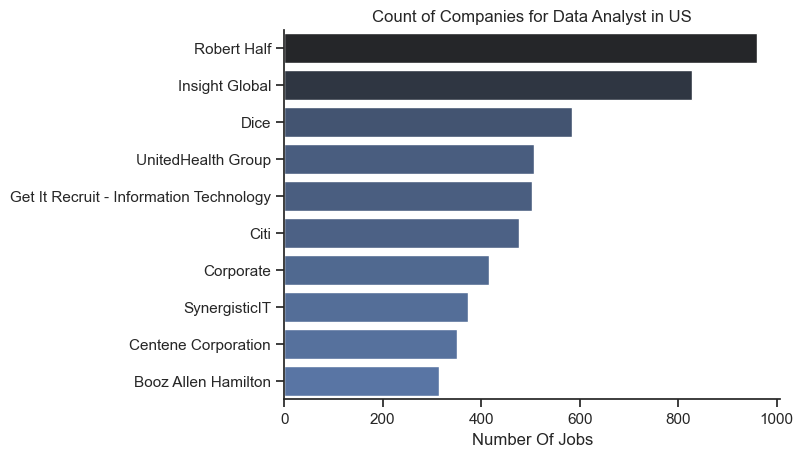

In [64]:

df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')

ax = sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='dark:b_r',legend= False)
ax.set_ylabel('')
sns.despine()
plt.title('Count of Companies for Data Analyst in US')
plt.xlabel('Number Of Jobs')
plt.show()